In [1]:
import pandas as pd
import matplotlib as mp

import numpy as np
from matplotlib import pyplot as plt


In [2]:
contents = pd.read_csv("../data/train_data_final.csv")

In [3]:
categorical_variables = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 

contents.drop(categorical_variables,axis=1,inplace=True)

payment_variables = []
spending_variables = []
delinquency_variables = []
balance_variables = []
risk_variables = []
for column in contents.columns:
    if 'P' in column:
        payment_variables.append(column)
    if 'S' in column and 'S_2' != column:
        spending_variables.append(column)
    if 'D' in column and 'ID' not in column:
        delinquency_variables.append(column)
    if 'B' in column:
        balance_variables.append(column)
    if 'R' in column:
        risk_variables.append(column)



In [4]:
print(spending_variables)

['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']


In [5]:
pd.set_option('display.max_rows',None)
contents.drop('customer_ID',axis=1,inplace=True)

contents.info(max_cols=195,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Data columns (total 180 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    Unnamed: 0  276572 non-null  int64  
 1    S_2         276572 non-null  object 
 2    P_2         274277 non-null  float64
 3    D_39        276572 non-null  float64
 4    B_1         276572 non-null  float64
 5    B_2         276476 non-null  float64
 6    R_1         276572 non-null  float64
 7    S_3         225400 non-null  float64
 8    D_41        276476 non-null  float64
 9    B_3         276476 non-null  float64
 10   D_42        39357 non-null   float64
 11   D_43        193452 non-null  float64
 12   D_44        262857 non-null  float64
 13   B_4         276572 non-null  float64
 14   D_45        276476 non-null  float64
 15   B_5         276572 non-null  float64
 16   R_2         276572 non-null  float64
 17   D_46        215973 non-null  float64
 18   D_47        276572 non

In [6]:
contents.notna().sum()

Unnamed: 0    276572
S_2           276572
P_2           274277
D_39          276572
B_1           276572
B_2           276476
R_1           276572
S_3           225400
D_41          276476
B_3           276476
D_42           39357
D_43          193452
D_44          262857
B_4           276572
D_45          276476
B_5           276572
R_2           276572
D_46          215973
D_47          276572
D_48          240733
D_49           27226
B_6           276568
B_7           276572
B_8           275402
D_50          119378
D_51          276572
B_9           276572
R_3           276572
D_52          275080
P_3           261411
B_10          276572
D_53           72394
S_5           276572
B_11          276572
S_6           276572
D_54          276476
R_4           276572
S_7           225400
B_12          276572
S_8           276572
D_55          267353
D_56          126557
B_13          274054
R_5           276572
D_58          276572
S_9           129671
B_14          276572
D_59         

In [7]:
pd.set_option('display.max_rows',20)
contents[contents['P_2'].isna()]

,Unnamed: 0,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
411,4732228,2017-07-28,NaN,0.000996,0.002041,0.814279,0.009560,NaN,0.003586,0.008875,...,NaN,NaN,0.008308,0.001609,0.007423,NaN,0.003086,0.005993,0.009139,0
559,5434874,2018-01-20,NaN,0.001712,0.003781,0.810946,0.005817,NaN,0.008217,0.006753,...,NaN,NaN,0.000193,0.001974,0.003761,NaN,0.008485,0.001002,0.002589,0
581,4790069,2017-06-04,NaN,0.006803,0.331306,0.816098,0.000273,0.354266,0.007548,0.004502,...,NaN,NaN,NaN,0.002476,NaN,NaN,NaN,0.002598,NaN,0
744,1395044,2017-06-25,NaN,0.001750,0.130514,0.811767,0.001172,0.177758,0.001988,0.003734,...,NaN,NaN,NaN,0.000141,NaN,NaN,NaN,0.004857,NaN,1
773,3560937,2018-03-29,NaN,0.008568,0.002716,0.811562,0.509233,0.759026,0.006266,0.010770,...,0.00063,0.009936,0.004754,0.002458,0.000301,NaN,0.006386,0.008323,0.001319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275883,3967537,2017-04-11,NaN,0.003327,0.009667,0.817350,0.009800,NaN,0.004681,0.000689,...,NaN,NaN,0.004761,0.005119,0.008709,NaN,0.005945,0.003846,0.003581,0
275955,2571719,2017-06-13,NaN,0.008480,0.006125,0.814733,0.009708,NaN,0.000031,0.009133,...,NaN,NaN,0.009914,0.009757,0.000145,NaN,0.004263,0.000595,0.004488,0
276034,2498504,2017-07-30,NaN,0.005834,0.013901,0.817553,0.002634,0.174709,0.007127,0.004118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
276290,5394798,2017-05-27,NaN,0.009401,0.008935,0.819288,0.007140,NaN,0.001150,0.003381,...,NaN,NaN,0.006661,0.000037,0.002931,NaN,0.008985,0.006560,0.009539,0


In [8]:
contents['P_2'] = contents['P_2'].fillna(contents['P_2'].median())

In [9]:
contents['target'].value_counts()

0    207727
1     68845
Name: target, dtype: int64

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

payment_variables_target = payment_variables.copy()
payment_variables_target.append('target')

contents[payment_variables_target].corr()['target']

P_2      -0.606831
P_3      -0.244047
P_4       0.235485
target    1.000000
Name: target, dtype: float64

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

spending_variables_target = spending_variables.copy()
spending_variables_target.append('target')

contents[spending_variables_target].corr()['target']

S_3       0.320134
S_5       0.050241
S_6      -0.097703
S_7       0.331939
S_8      -0.153841
S_9       0.072419
S_11     -0.085083
S_12      0.007074
S_13     -0.106919
S_15      0.189984
S_16      0.068111
S_17      0.035257
S_18     -0.009101
S_19      0.012374
S_20      0.132843
S_22      0.090131
S_23      0.170658
S_24      0.097905
S_25     -0.247013
S_26     -0.045096
S_27     -0.024480
target    1.000000
Name: target, dtype: float64

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

delinquency_variables_target = delinquency_variables.copy()
delinquency_variables_target.append('target')

contents[delinquency_variables_target].corr()['target']

D_39      0.176520
D_41      0.246224
D_42      0.332121
D_43      0.281167
D_44      0.469934
D_45     -0.270465
D_46      0.156016
D_47     -0.279243
D_48      0.547005
D_49     -0.016257
D_50     -0.085804
D_51     -0.248136
D_52     -0.226090
D_53      0.223869
D_54     -0.136309
D_55      0.456379
D_56     -0.143396
D_58      0.448358
D_59      0.192445
D_60     -0.078383
D_61      0.496994
D_62     -0.351227
D_65      0.104801
D_69      0.011638
D_70      0.301883
D_71     -0.074754
D_72      0.181424
D_73     -0.095825
D_74      0.419973
D_75      0.455876
D_76     -0.115792
D_77     -0.333910
D_78      0.270571
D_79      0.222630
D_80      0.057945
D_81      0.179925
D_82      0.020139
D_83      0.079472
D_84      0.187203
D_86     -0.065253
D_87           NaN
D_88      0.153772
D_89      0.110953
D_91     -0.121785
D_92     -0.147375
D_93     -0.036551
D_94     -0.069987
D_96     -0.062009
D_102     0.021581
D_103     0.122586
D_104     0.121896
D_105    -0.031611
D_106    -0.

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

balance_variables_target = balance_variables.copy()
balance_variables_target.append('target')

contents[balance_variables_target].corr()['target']

B_1       0.386185
B_2      -0.480921
B_3       0.425635
B_4       0.402672
B_5      -0.068546
B_6      -0.095293
B_7       0.430059
B_8       0.323230
B_9       0.471563
B_10     -0.020117
B_11      0.364999
B_12     -0.044047
B_13     -0.032742
B_14      0.081831
B_15      0.007691
B_16      0.395181
B_17      0.270225
B_18     -0.486525
B_19      0.385684
B_20      0.380335
B_21      0.088228
B_22      0.366588
B_23      0.422405
B_24      0.109979
B_25      0.183590
B_26      0.017413
B_27      0.004888
B_28      0.223733
B_29      0.061650
B_31     -0.061597
B_32      0.102343
B_33     -0.452216
B_36      0.046426
B_37      0.383575
B_39     -0.099193
B_40      0.047127
B_41      0.094847
B_42     -0.127799
target    1.000000
Name: target, dtype: float64

In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

risk_variables_target = risk_variables.copy()
risk_variables_target.append('target')

contents[risk_variables_target].corr()['target']

R_1       0.363745
R_2       0.263613
R_3       0.286312
R_4       0.220099
R_5       0.165115
R_6       0.106384
R_7       0.062832
R_8       0.151606
R_9      -0.013804
R_10      0.236563
R_11      0.094499
R_12     -0.135348
R_13      0.097994
R_14      0.040062
R_15      0.127931
R_16      0.127347
R_17      0.074545
R_18      0.003557
R_19      0.097373
R_20      0.112410
R_21      0.151843
R_22      0.064700
R_23      0.018468
R_24      0.151508
R_25      0.064303
R_26      0.133191
R_27     -0.274128
R_28      0.027718
target    1.000000
Name: target, dtype: float64

In [15]:
columna = 'S_' + '3'
contents[columna].min()

-0.4430886481493405

<AxesSubplot:xlabel='P_2', ylabel='target'>

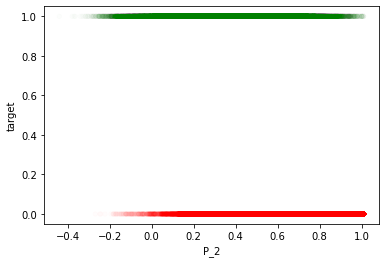

In [16]:
contents.plot.scatter(x='P_2',y='target',c=contents['target'].map({0:'r',1:'g'}),alpha=0.01)

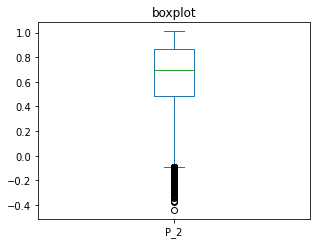

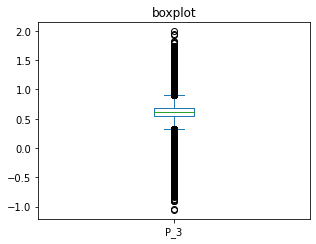

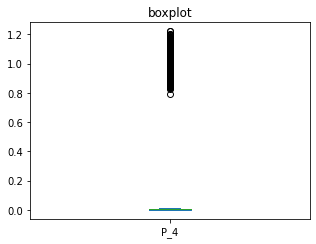

In [17]:


plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for v in payment_variables:
    ax = contents[v].plot(kind='box', title='boxplot')

    plt.show()

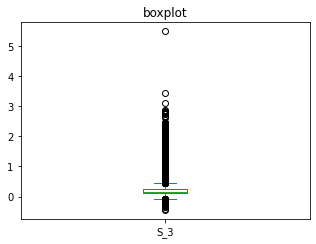

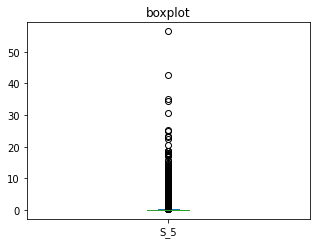

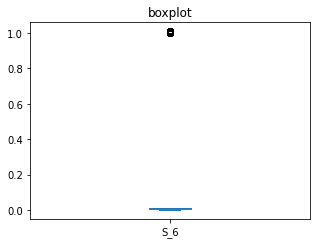

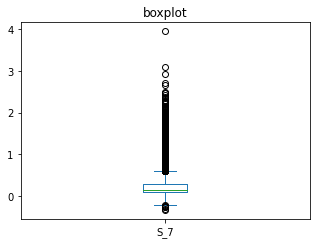

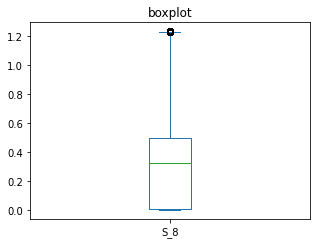

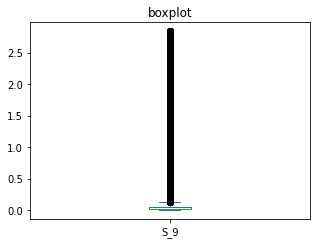

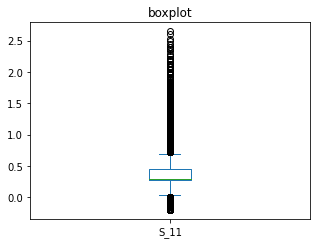

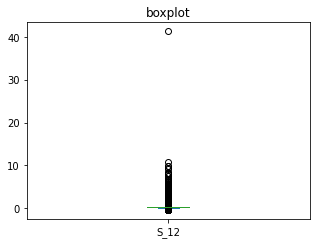

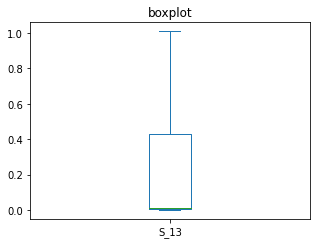

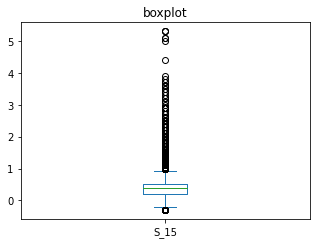

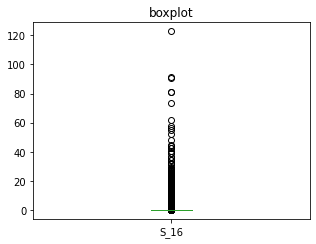

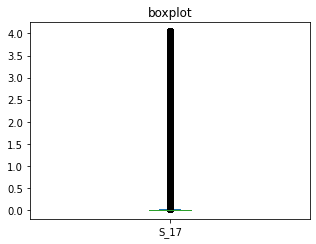

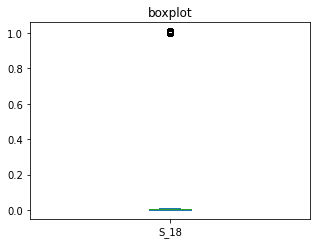

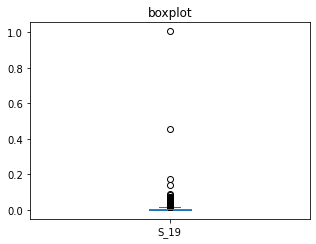

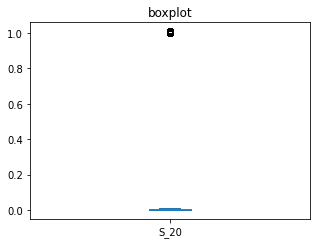

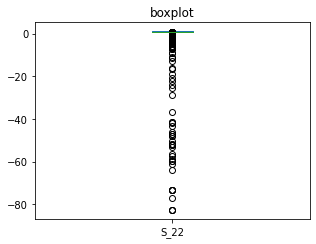

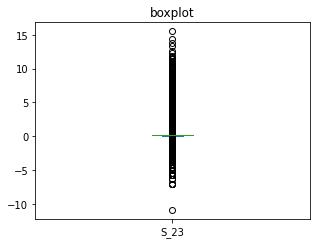

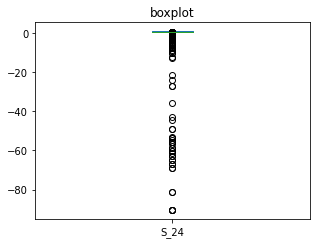

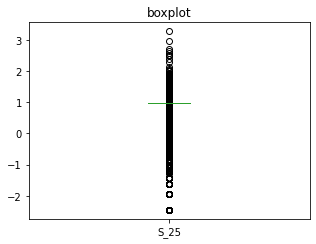

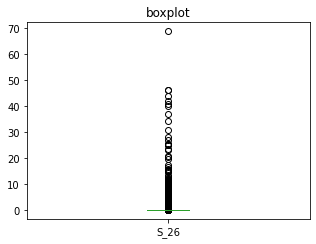

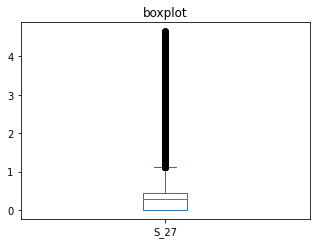

In [18]:
plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for v in spending_variables:
    ax = contents[v].plot(kind='box', title='boxplot')

    plt.show()

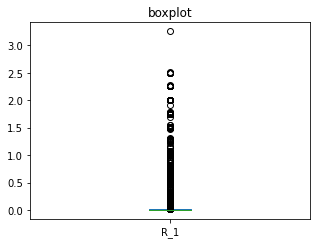

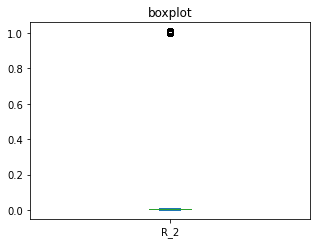

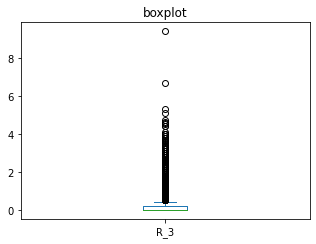

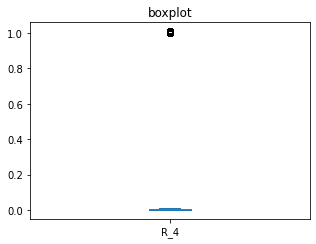

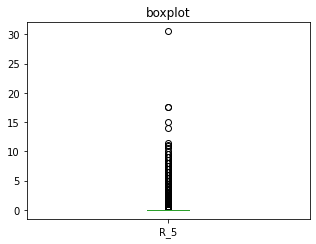

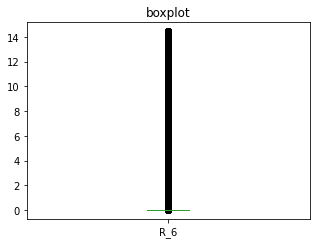

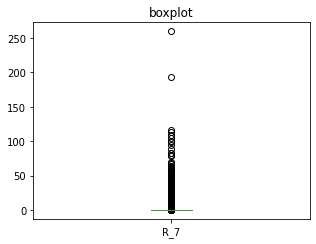

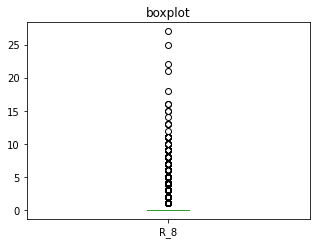

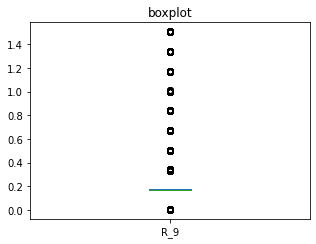

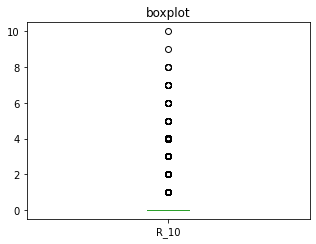

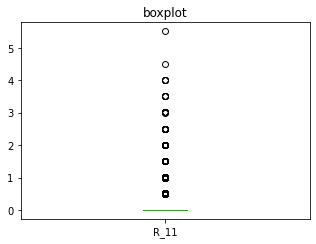

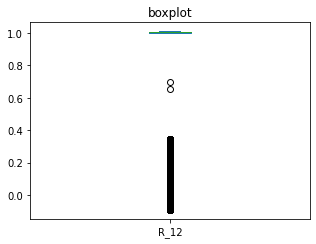

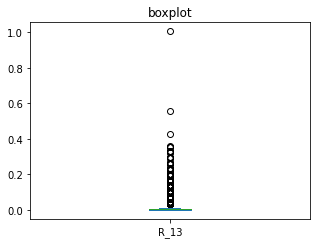

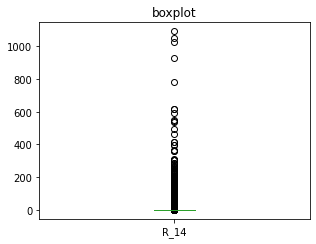

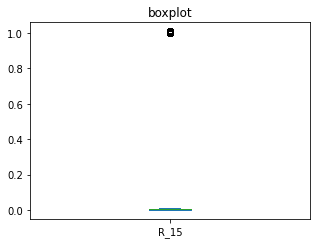

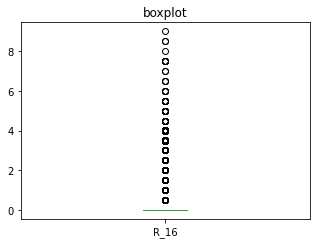

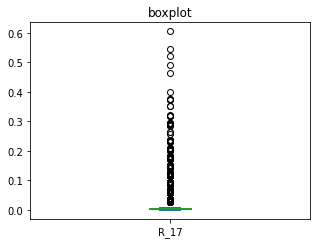

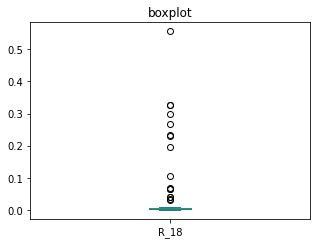

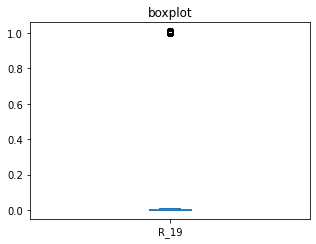

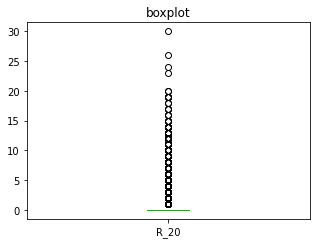

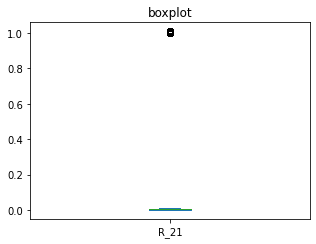

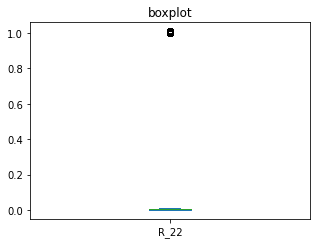

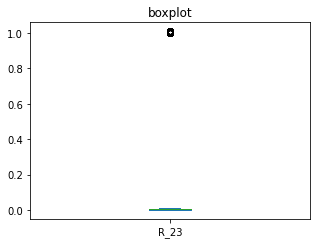

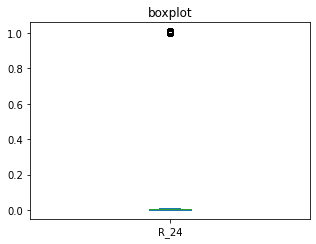

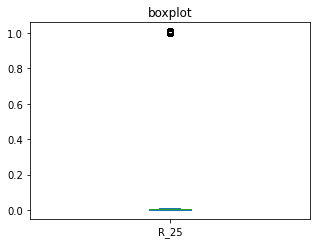

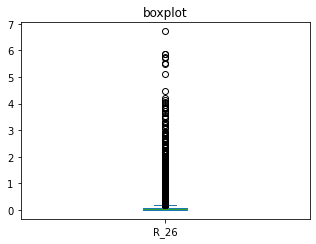

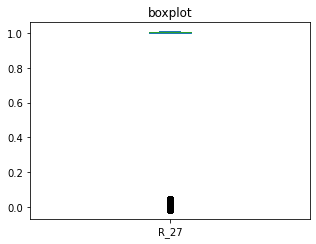

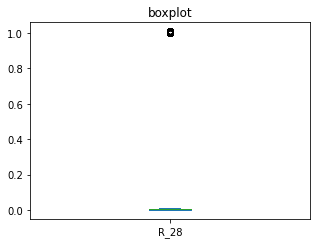

In [19]:
plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for v in risk_variables:
    ax = contents[v].plot(kind='box', title='boxplot')
    plt.show()

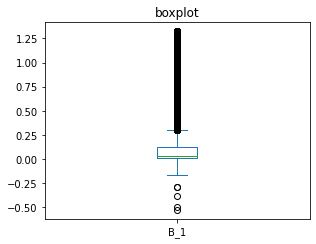

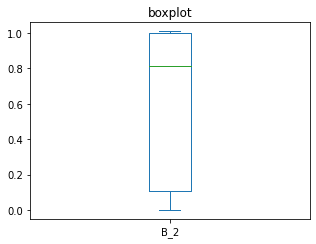

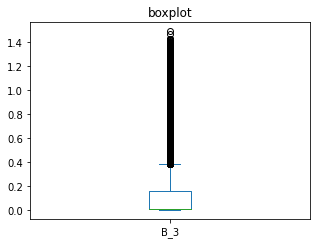

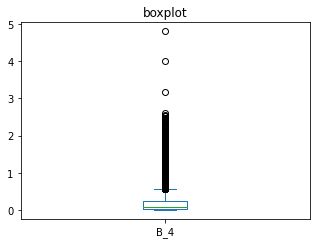

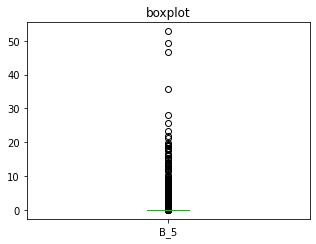

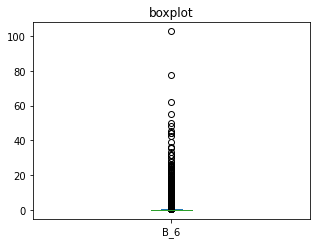

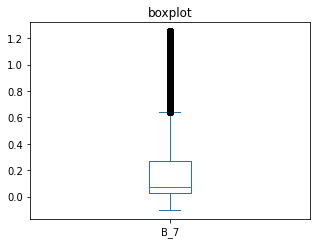

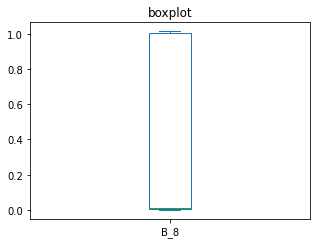

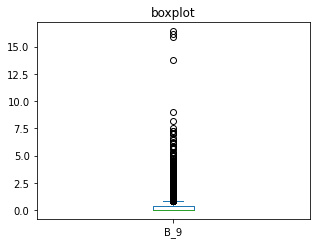

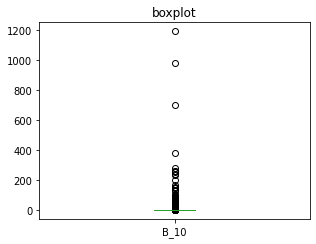

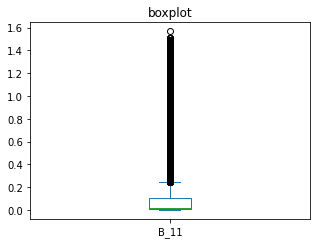

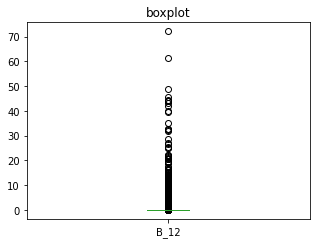

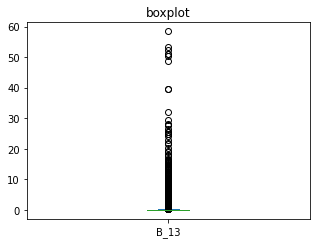

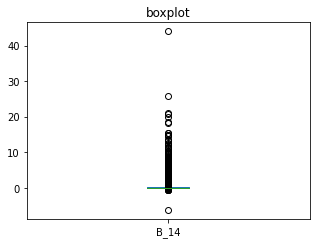

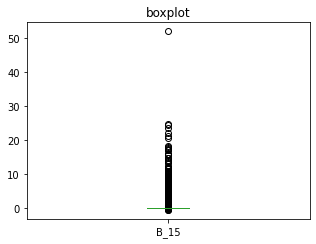

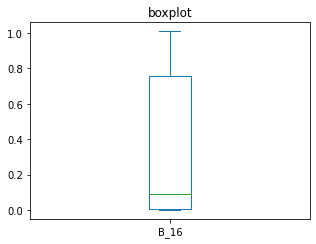

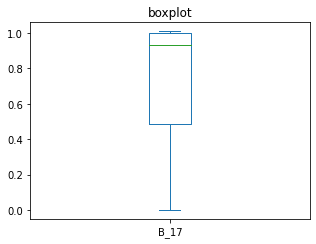

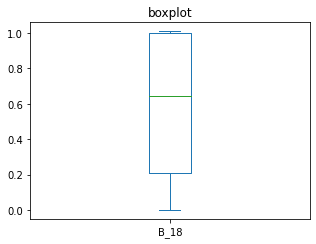

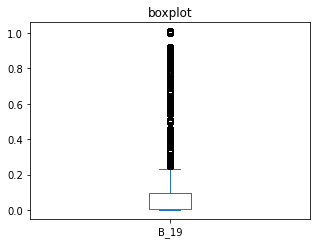

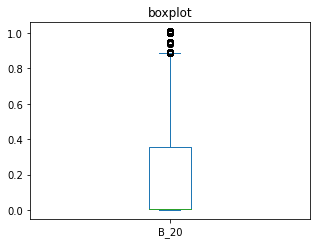

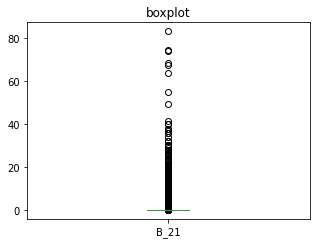

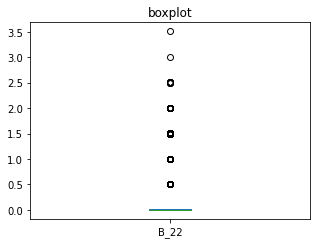

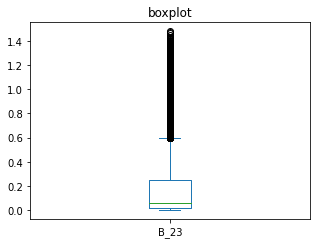

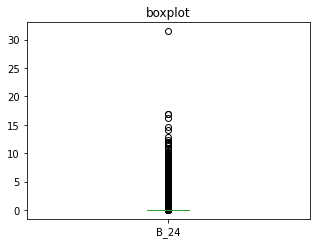

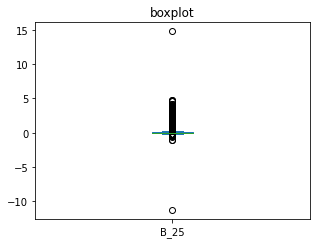

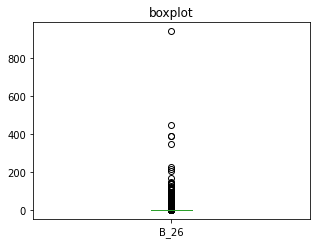

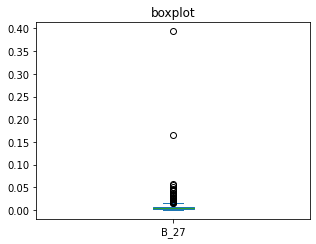

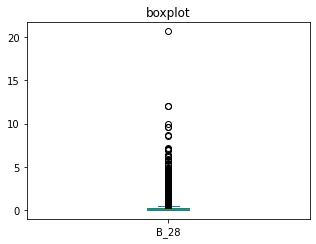

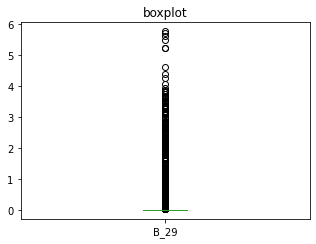

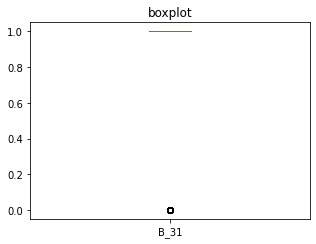

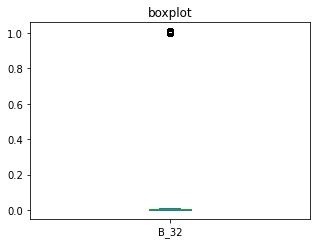

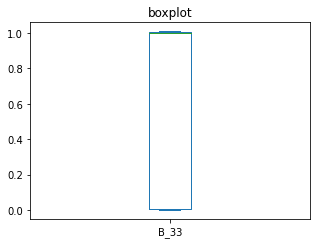

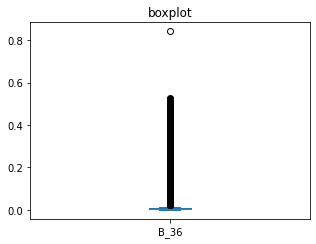

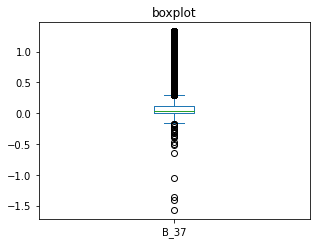

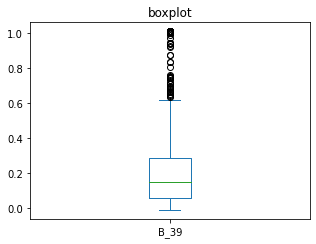

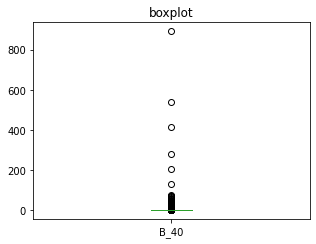

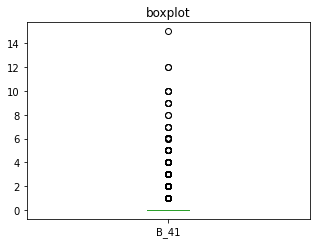

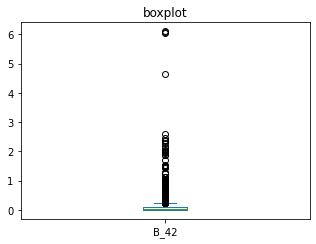

In [20]:
plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for v in balance_variables:
    ax = contents[v].plot(kind='box', title='boxplot')
    plt.show()

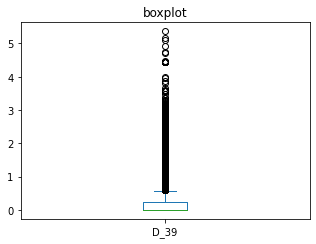

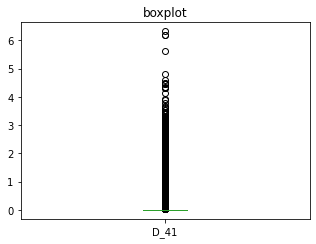

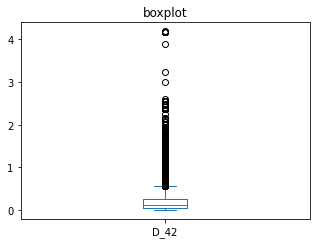

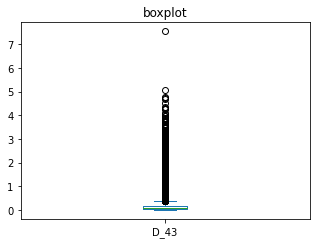

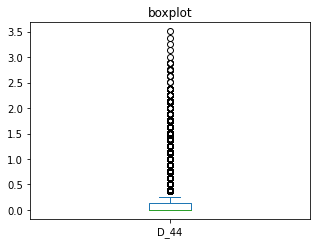

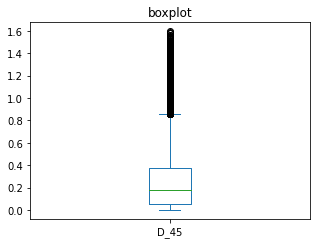

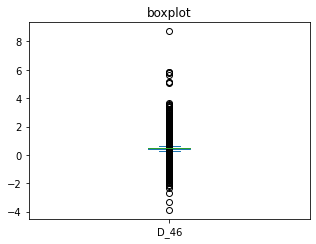

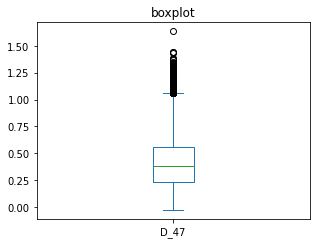

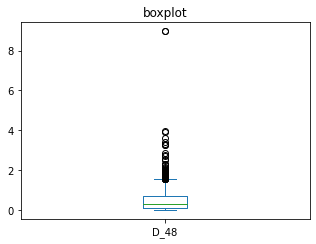

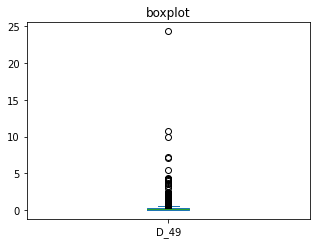

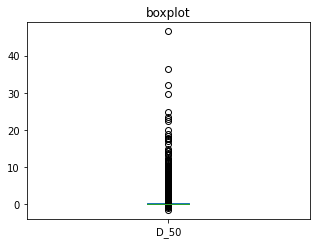

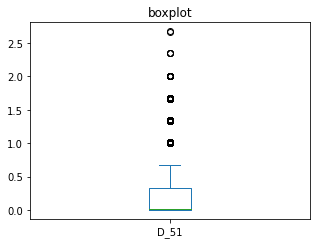

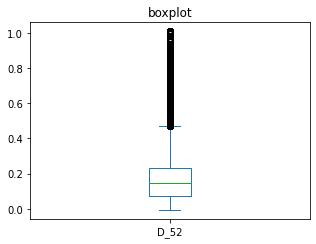

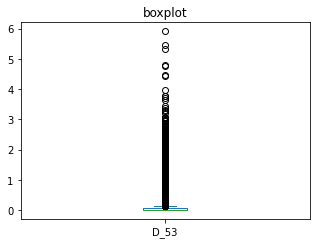

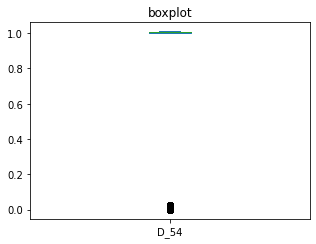

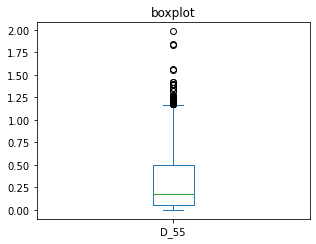

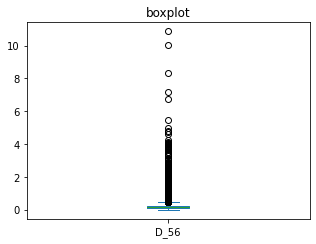

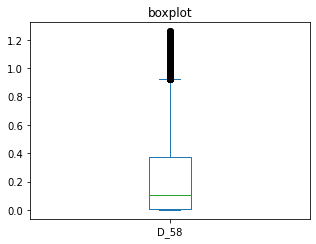

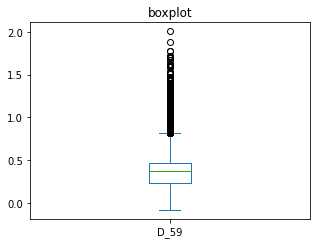

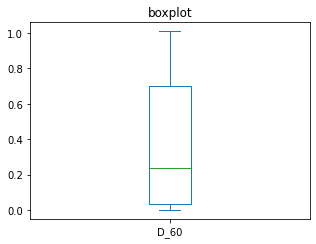

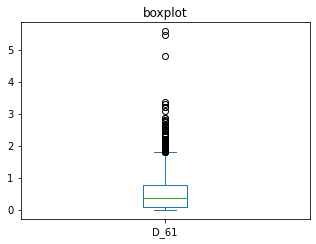

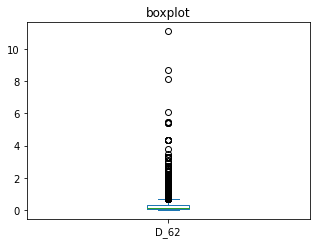

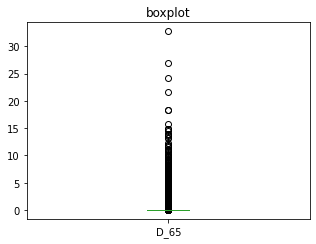

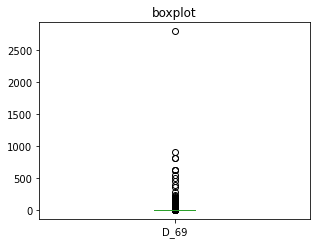

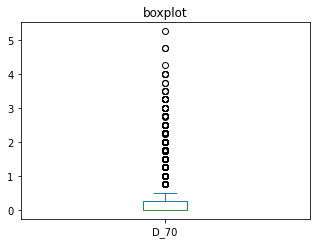

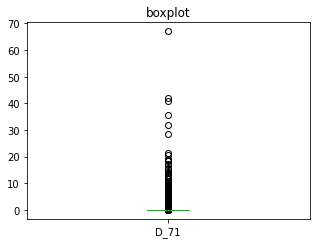

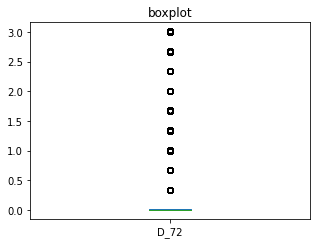

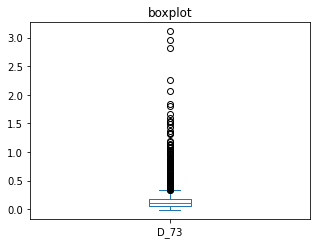

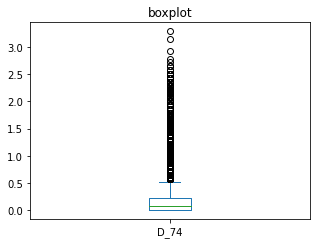

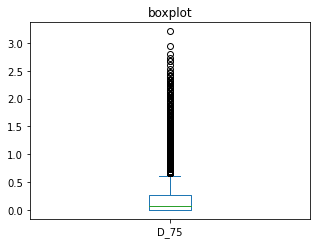

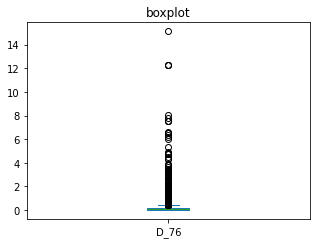

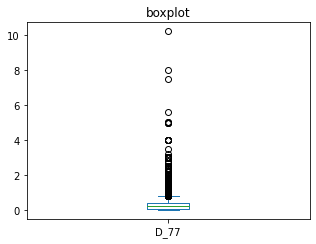

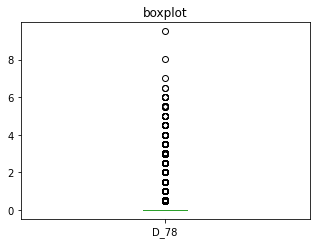

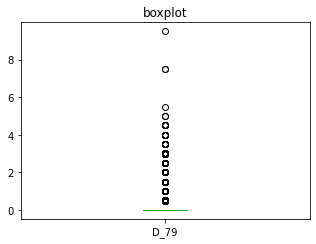

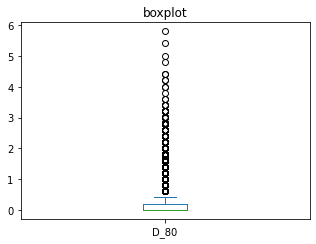

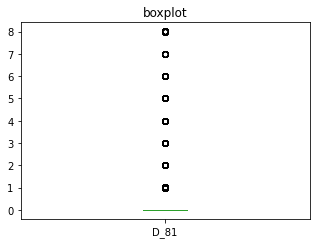

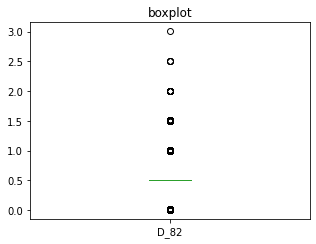

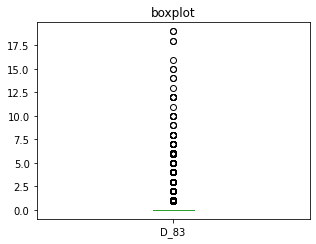

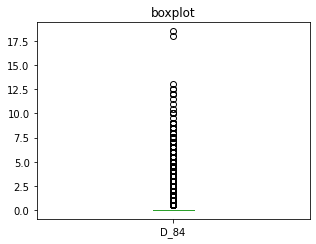

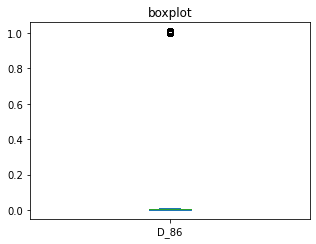

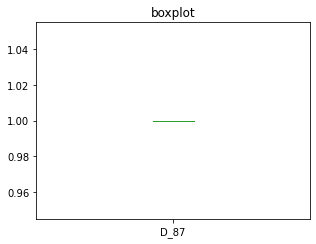

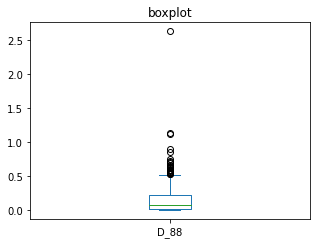

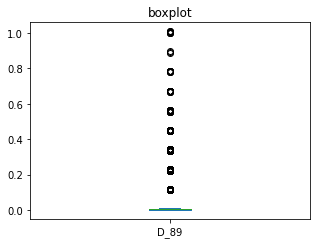

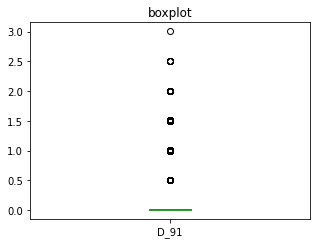

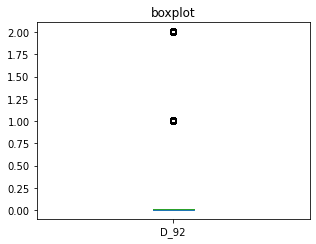

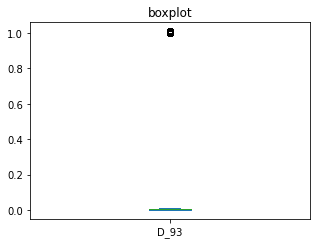

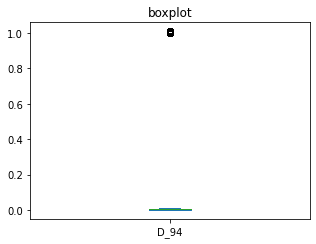

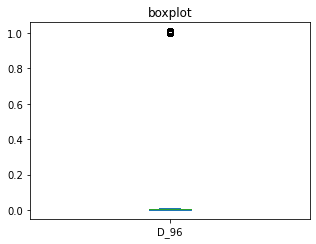

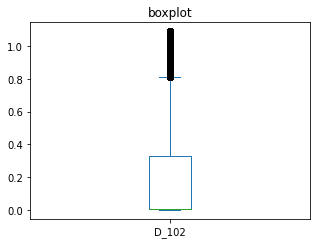

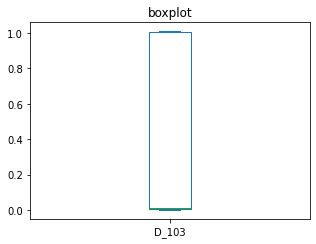

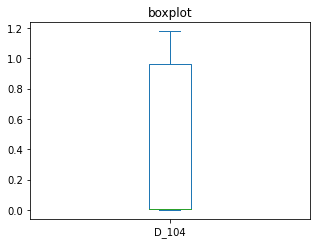

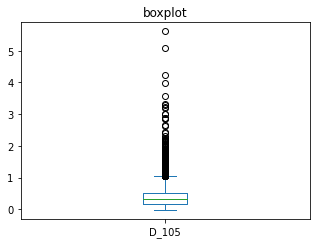

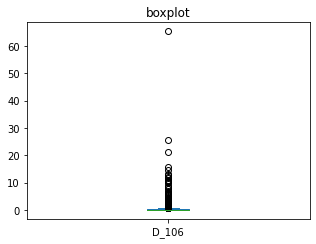

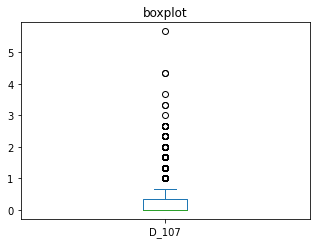

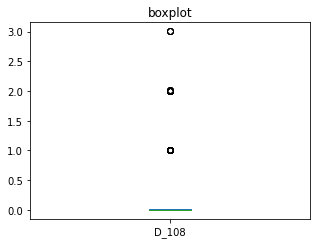

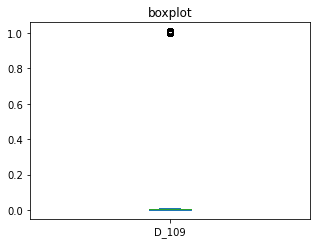

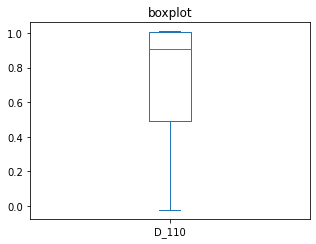

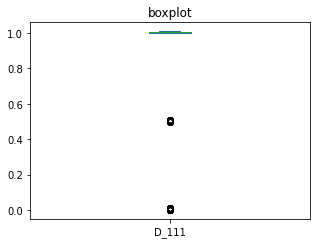

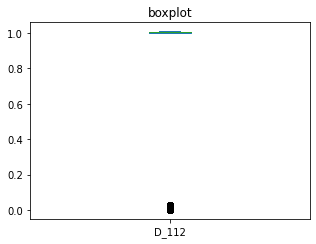

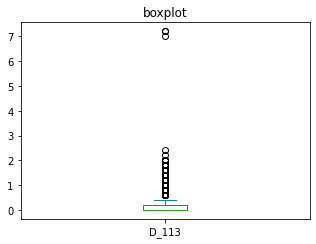

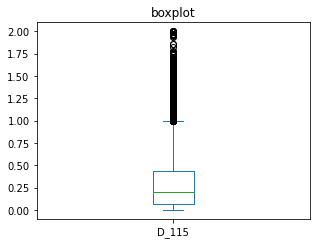

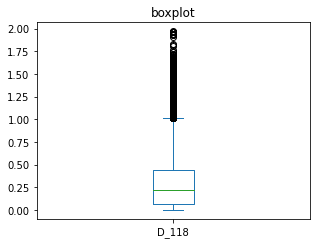

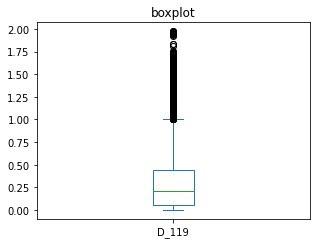

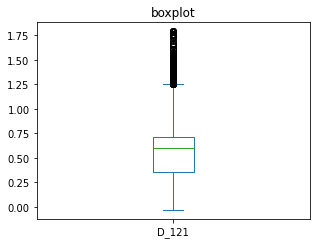

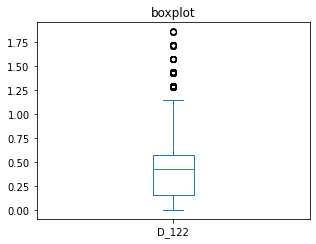

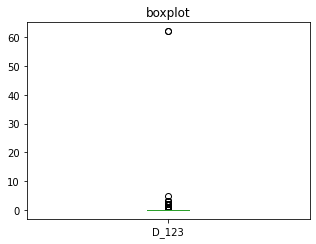

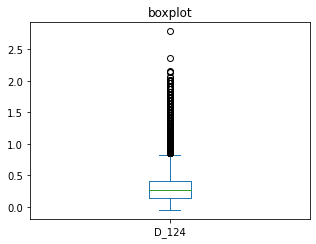

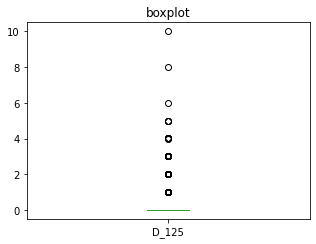

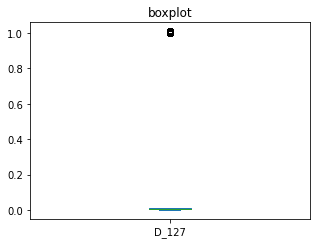

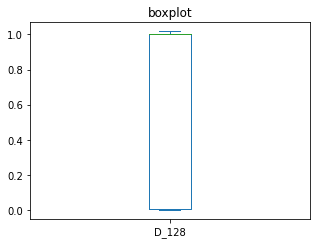

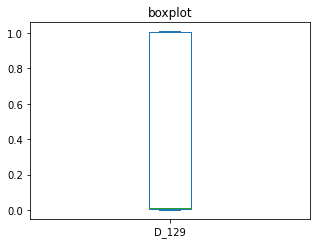

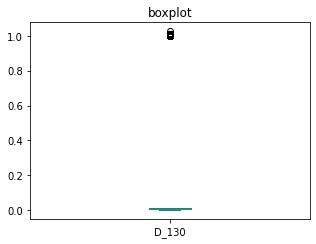

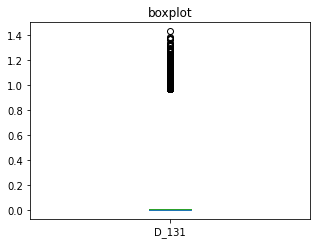

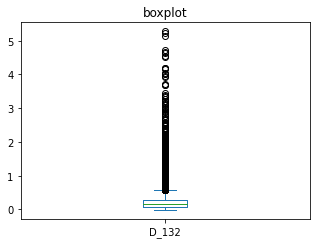

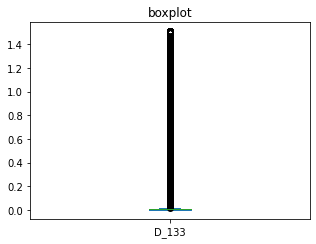

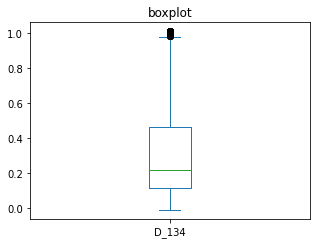

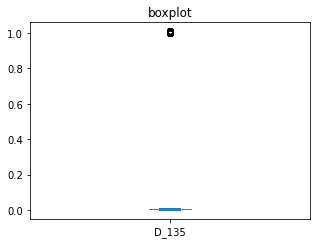

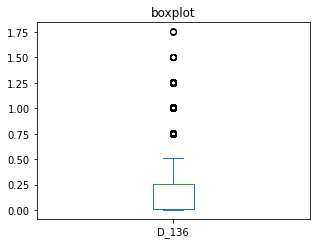

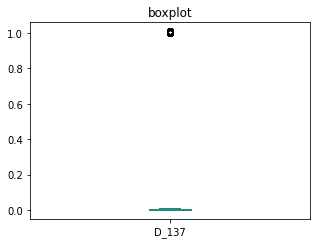

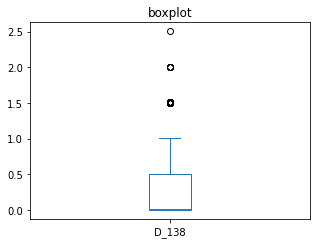

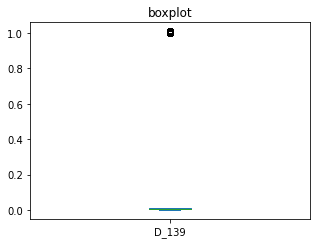

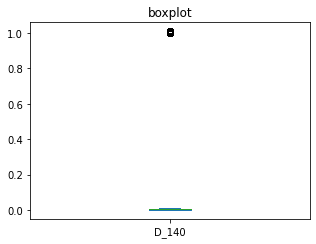

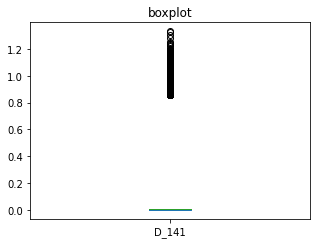

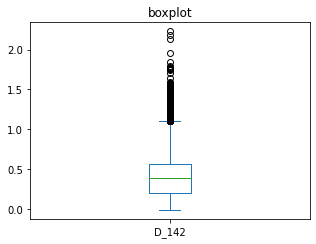

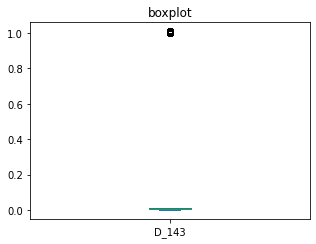

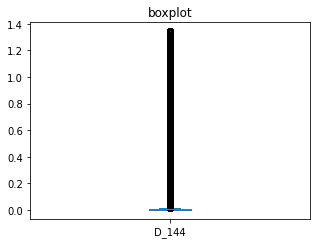

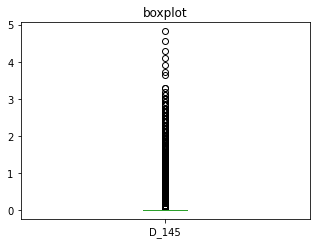

In [21]:
plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for v in delinquency_variables:
    ax = contents[v].plot(kind='box', title='boxplot')
    plt.show()

Como conclusion de todos estos plots es para hacer un analisis sobre cada label del set de datos a nivel visual, permitiendonos ver el tema de outliers que es lo más critico para el rendimiento de algunos algortimos.